In [ ]:
# "Flood Prediction"
> "Flood Prediction of Indian State using the Rainfall data."

- badges: true
- comments: true
- categories: [machine_learning, tensorflow]
- hide: false
- author: Atiq Urrehaman
- search_exclude: false

<h1 align="center" style="color:#ff79c6">Hackathon - 6.0</h1>
<h5 align="center">Category - A:  AI - Natural Disaster Prediction</h5>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# For label encoding the SUBDIVISION as the one hot encoding increase the column by 36 which effect our model accuracy
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [3]:
tf.print(tf.__version__)

2.7.0


In [4]:
data = pd.read_csv('./data/rainfall-in-india-1901-2015.csv')

In [5]:
data.tail(20)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4096,LAKSHADWEEP,1996,44.7,1.1,1.6,17.4,50.0,427.1,335.3,197.3,230.4,109.0,60.5,131.6,1606.0,45.8,69.0,1190.1,301.1
4097,LAKSHADWEEP,1997,2.2,0.1,4.9,33.8,62.3,307.0,459.6,216.8,144.0,213.5,200.8,119.7,1764.7,2.3,101.0,1127.4,534.0
4098,LAKSHADWEEP,1998,52.0,0.0,1.8,40.3,68.2,382.0,388.8,196.7,274.7,184.8,144.1,253.5,1986.9,52.0,110.3,1242.2,582.4
4099,LAKSHADWEEP,1999,47.8,2.5,18.3,20.6,416.7,279.6,459.4,133.8,73.4,305.0,51.2,49.0,1857.3,50.3,455.6,946.2,405.2
4100,LAKSHADWEEP,2000,83.3,18.9,3.4,47.9,204.6,225.4,95.5,319.9,164.5,141.4,56.3,11.0,1372.1,102.2,255.9,805.3,208.7
4101,LAKSHADWEEP,2001,4.4,20.4,0.0,104.6,187.3,283.9,198.9,144.3,213.5,105.2,101.5,16.6,1380.6,24.8,291.9,840.6,223.3
4102,LAKSHADWEEP,2002,10.8,16.8,7.2,23.4,189.8,261.8,81.3,143.9,50.0,178.2,52.9,17.4,1033.5,27.6,220.4,537.0,248.5
4103,LAKSHADWEEP,2003,11.8,18.2,28.5,18.1,109.6,364.5,400.6,92.1,84.3,191.6,206.1,7.5,1532.9,30.0,156.2,941.5,405.2
4104,LAKSHADWEEP,2004,7.2,1.5,1.9,7.7,330.2,251.2,280.8,169.5,200.0,193.4,107.6,2.2,1553.2,8.7,339.8,901.5,303.2
4105,LAKSHADWEEP,2005,17.6,11.1,0.0,37.0,92.8,248.5,378.9,102.4,278.0,164.2,218.3,26.6,1575.4,28.7,129.8,1007.8,409.1


In [6]:
subdivision = data["SUBDIVISION"].unique()
len(subdivision)

36

In [7]:
label_sub = le.fit_transform(data["SUBDIVISION"])

In [8]:
updated_data = data.drop("SUBDIVISION", axis="columns")

In [9]:
updated_data.insert(0, "SUBDIVISION", label_sub)

In [10]:
updated_data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,18,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,18,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,18,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,18,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [84]:
for x in updated_data.columns:
    if updated_data[x].isnull().sum()>1:
        print(f"{x} : {updated_data[x].isnull().sum()}")

SUBDIVISION : 0
YEAR : 0
JAN : 0
FEB : 0
MAR : 0
APR : 0
MAY : 0
JUN : 0
JUL : 0
AUG : 0
SEP : 0
OCT : 0
NOV : 0
DEC : 0
ANNUAL : 0
Jan-Feb : 0
Mar-May : 0
Jun-Sep : 0
Oct-Dec : 0


In [76]:
for x in updated_data.columns:
    updated_data[x]=updated_data[x].fillna(updated_data[x].mean())

updated_data[:30]

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,0,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,0,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,0,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,0,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,0,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,0,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,0,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,0,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,0,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [11]:
import os

if os.path.isfile("./data/updated-data.csv") is False:
    updated_data.to_csv("./data/updated-data.csv", index=False)

In [12]:
updated_shuffled_data = updated_data.sample(frac = 1)

In [13]:
import os

if os.path.isfile("./data/updated-shuffled-data.csv") is False:
    updated_shuffled_data.to_csv("./data/updated-shuffled-data.csv", index=False)

In [14]:
updated_shuffled_data.shape

(4116, 19)

In [15]:
updated_shuffled_data

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
2059,33,1913,0.0,7.6,3.0,0.0,28.2,168.7,290.0,220.4,58.5,0.4,0.3,13.4,790.5,7.6,31.2,737.7,14.1
2422,26,1931,0.2,0.6,0.0,0.1,3.1,8.1,115.0,119.2,20.8,60.1,2.5,0.0,329.7,0.7,3.2,263.1,62.6
1957,8,1926,6.1,1.1,28.7,2.5,18.6,13.9,216.1,342.6,202.3,0.2,0.0,0.2,832.4,7.3,49.8,774.9,0.4
1470,12,2014,13.0,17.3,26.8,7.5,20.3,25.9,72.3,34.8,67.3,10.5,0.2,9.6,305.5,30.3,54.6,200.2,20.3
2554,17,1948,10.5,0.0,0.2,2.3,7.2,599.3,1080.4,797.3,376.6,77.7,168.1,0.0,3119.8,10.5,9.8,2853.6,245.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1842,34,1926,5.4,0.3,19.4,0.8,21.4,4.0,95.6,179.4,113.6,0.0,0.0,0.3,440.2,5.7,41.6,392.6,0.3
398,21,1977,14.2,34.9,27.7,383.8,303.7,452.0,389.1,355.8,193.0,149.6,38.2,16.6,2358.5,49.1,715.1,1389.9,204.4
416,21,1995,5.4,36.5,52.0,68.7,254.5,425.8,403.6,495.9,312.5,129.7,155.3,0.2,2340.2,41.9,375.2,1637.9,285.3
533,28,1997,18.9,31.3,76.4,119.5,166.9,613.3,488.1,479.0,443.9,41.3,16.3,56.5,2551.4,50.2,362.9,2024.2,114.1


In [28]:
X = np.array(updated_shuffled_data.iloc[:,0])

In [29]:
#expanding the diamension
#X = np.expand_dims(X, axis=0)

In [30]:
y = np.array(updated_shuffled_data.iloc[:, 2:15])

In [47]:
y.shape

(4116, 13)

#### Spliting Data into three set (train, test, validation)

Using the principle 70:15:15 %

In [67]:
# train data

X_train = X[:2882]
X_train =  np.stack(X_train, axis=0)  
y_train = y[:2882]

len(X_train), len(y_train), X_train.shape

(2882, 2882, (2882,))

In [59]:
# testing data

X_test = X[2882:3499]
y_test = y[2882:3499]

In [60]:
# validation data

X_val = X[3440:4116]
y_val = y[3449:4116]

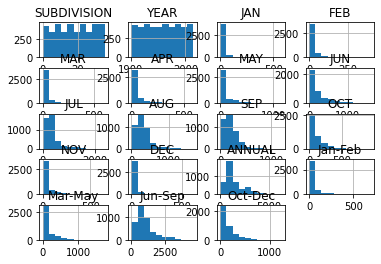

In [61]:
histogram = updated_shuffled_data
histogram.hist()
plt.show()

##### Building a multi-label classification

In [63]:
# creating model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", name="hidden_layer1", input_shape=(1,)),
    tf.keras.layers.Dense(20, activation="relu", name="hidden_layer2"),
    tf.keras.layers.Dense(13, activation="sigmoid", name="output_layer")

])

In [64]:
# compiling the model

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics=["accuracy"]
)

In [65]:
# Fitting the model

history = model.fit(
     X_train,
     y_train,
     batch_size = 32,
     epochs=10,
    validation_data=(X_test, y_test)
)

Epoch 1/10
91/91 [==============================] - 2s 7ms/step - loss: nan - accuracy: 6.9396e-04 - val_loss: nan - val_accuracy: 0.0016
Epoch 2/10
91/91 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0016
Epoch 3/10
91/91 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0016
Epoch 4/10
91/91 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0016
Epoch 5/10
91/91 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0016
Epoch 6/10
91/91 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0016
Epoch 7/10
91/91 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0016
Epoch 8/10
91/91 [================

In [66]:
model.evaluate(X_val, y_val)

ValueError: Data cardinality is ambiguous:
  x sizes: 676
  y sizes: 667
Make sure all arrays contain the same number of samples.

In [50]:
X.squeeze()

array([33, 26,  8, ..., 21, 28, 14])

In [51]:
X

array([33, 26,  8, ..., 21, 28, 14])